<a href="https://colab.research.google.com/github/DanielTusingwire/CUU-Lab-2024/blob/main/Question4_Random_forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 4**

Q.4. Consider the data set in Risck_factor, use it to:

a) Produce the Random forest model that can classify the risk factors such as Population
Behavior, Motor vehicle condition and Road environment (10 marks)

b) Evaluate the model by producing the confusion matrix figure. (10 marks)

c) State the values of:

i. Recall. (1 mark)

ii. Precision. (1 mark)

iii. F1-score. (1 mark)

iv. Accuracy. (1 mark)

v. Jacard index. (1 mark)

Total 25 Marks


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("/content/drive/MyDrive/SIMULATION_FINAL/Risk_Factors.csv")
df = pd.DataFrame(data)
df

,Year,Fatal,Serious,Minor,Risk_Factor,Total_Crashes
0,2020,1081,2611,1666,Population Behaviour,5358
1,2019,835,2587,1740,Population Behaviour,5162
2,2018,830,2698,2013,Population Behaviour,5541
3,2017,720,2951,2027,Population Behaviour,5698
4,2016,710,3245,2612,Population Behaviour,6567
...,...,...,...,...,...,...
125,2015,625,960,1396,Road environment,2981
126,2014,703,990,1292,Road environment,2985
127,2013,585,1008,1302,Road environment,2895
128,2012,621,1108,1242,Road environment,2971


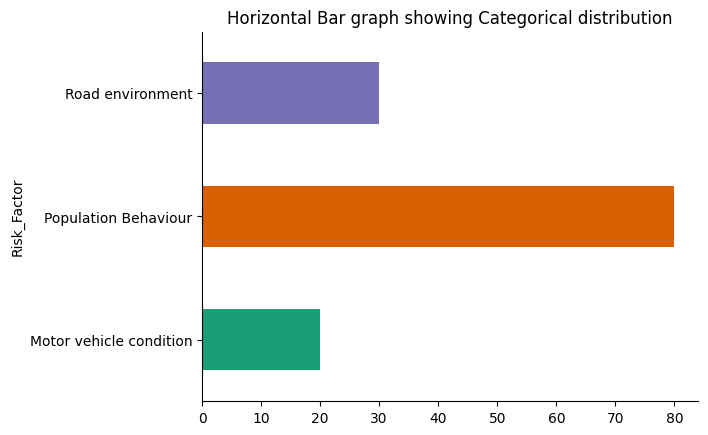

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

df.groupby('Risk_Factor').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Horizontal Bar graph showing Categorical distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)


In [4]:
# Changing the Risk factors into numeric values

label_encoder = LabelEncoder()
df['Risk_Factor'] = label_encoder.fit_transform(df['Risk_Factor'])

In [5]:
X = df.drop(['Risk_Factor', 'Year'], axis=1)
y = df['Risk_Factor']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Creating the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Feature ranking:
1. feature 0 (0.305425)
2. feature 1 (0.268717)
3. feature 3 (0.228139)
4. feature 2 (0.197719)


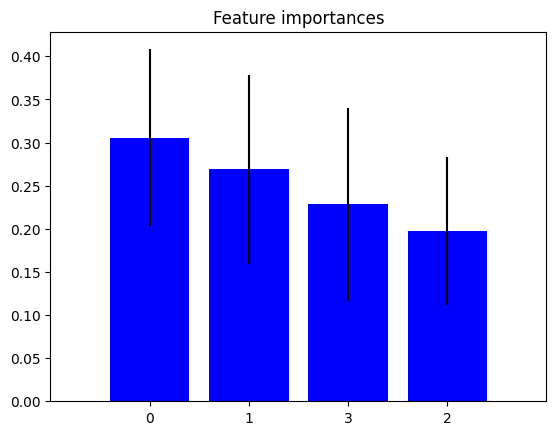

In [8]:

# **Graph for the model of random forest**

# Feature importance

import numpy as np

importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot feature importance
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="blue", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [9]:
# making the predication on the test data

y_pred = rf_classifier.predict(X_test)

# **b) Evaluate the model by producing the confusion matrix figure**

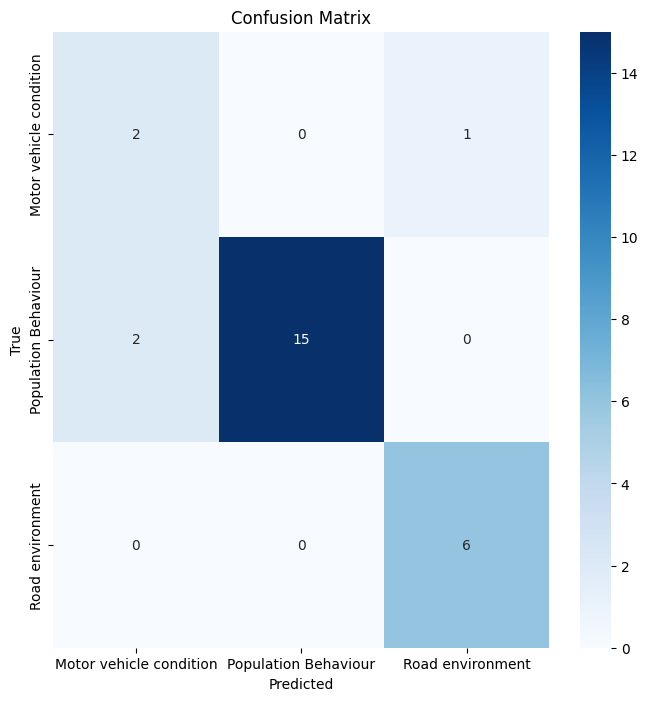

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **c) State the values of recall, precision, F1-score, accuracy, and Jaccard index**

In [12]:
from sklearn.metrics import classification_report, accuracy_score, jaccard_score

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
classification_report_df = pd.DataFrame(report).transpose()

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating Jaccard index for each class and then average
jaccard = jaccard_score(y_test, y_pred, average='macro')

# Printing the evaluation metrics
print("Classification Report:\n", classification_report_df)
print(f"Accuracy: {accuracy:.4f}")
print(f"Jaccard Index: {jaccard:.4f}")

# Extracting and printting individual metrics
recall = classification_report_df.loc['Population Behaviour', 'recall']
precision = classification_report_df.loc['Population Behaviour', 'precision']
f1_score = classification_report_df.loc['Population Behaviour', 'f1-score']

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1_score:.4f}")

# Printting values for other classes as well
recall_motor = classification_report_df.loc['Motor vehicle condition', 'recall']
precision_motor = classification_report_df.loc['Motor vehicle condition', 'precision']
f1_score_motor = classification_report_df.loc['Motor vehicle condition', 'f1-score']

recall_road = classification_report_df.loc['Road environment', 'recall']
precision_road = classification_report_df.loc['Road environment', 'precision']
f1_score_road = classification_report_df.loc['Road environment', 'f1-score']

print("\nMotor vehicle condition metrics:")
print(f"Recall: {recall_motor:.4f}")
print(f"Precision: {precision_motor:.4f}")
print(f"F1-score: {f1_score_motor:.4f}")

print("\nRoad environment metrics:")
print(f"Recall: {recall_road:.4f}")
print(f"Precision: {precision_road:.4f}")
print(f"F1-score: {f1_score_road:.4f}")


Classification Report:
                          precision    recall  f1-score    support
Motor vehicle condition   0.500000  0.666667  0.571429   3.000000
Population Behaviour      1.000000  0.882353  0.937500  17.000000
Road environment          0.857143  1.000000  0.923077   6.000000
accuracy                  0.884615  0.884615  0.884615   0.884615
macro avg                 0.785714  0.849673  0.810668  26.000000
weighted avg              0.909341  0.884615  0.891933  26.000000
Accuracy: 0.8846
Jaccard Index: 0.7132
Recall: 0.8824
Precision: 1.0000
F1-score: 0.9375

Motor vehicle condition metrics:
Recall: 0.6667
Precision: 0.5000
F1-score: 0.5714

Road environment metrics:
Recall: 1.0000
Precision: 0.8571
F1-score: 0.9231


# **Calculating using their methods**

In [ ]:
recall = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
recall_dict = {label_encoder.inverse_transform([i])[0]: recall[i] for i in range(len(recall))}
print("Recall:", recall_dict)

Recall: {'Motor vehicle condition': 0.6666666666666666, 'Population Behaviour': 0.8823529411764706, 'Road environment': 1.0}


In [ ]:
accuracy = (conf_matrix.diagonal().sum() / conf_matrix.sum())
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8846


In [ ]:
precision = conf_matrix.diagonal() / conf_matrix.sum(axis=0)
precision_dict = {label_encoder.inverse_transform([i])[0]: precision[i] for i in range(len(precision))}
print("Precision:", precision_dict)

Precision: {'Motor vehicle condition': 0.5, 'Population Behaviour': 1.0, 'Road environment': 0.8571428571428571}


In [ ]:
f1_score = 2 * (precision * recall) / (precision + recall)
f1_score_dict = {label_encoder.inverse_transform([i])[0]: f1_score[i] for i in range(len(f1_score))}
print("F1-score:", f1_score_dict)

F1-score: {'Motor vehicle condition': 0.5714285714285715, 'Population Behaviour': 0.9375, 'Road environment': 0.923076923076923}
